# ü¶† Disease Case Count Prediction Project


This notebook explores how different models perform in predicting disease case counts across U.S. states and years.  
We use data on temperature, income, rent, immunization rates, and more.

### üìå Models Used
- **ARIMA**: Univariate time series
- **SARIMA**: Time series with seasonality
- **Random Forest**: Tree-based regression
- **LSTM**: Deep learning for sequences

We compare performance and recommend the best model for forecasting.


## üì• Step 1: Load Dataset

In [4]:
import pandas as pd
df = pd.read_csv("final_model_dataset_with_features.csv")
df.head()

state  year  Precip_mm  Max_Temp_C  Min_Temp_C  median_household_income  \
0    AK  2020   3.413333   11.856667    5.636667                  77790.0   
1    AK  2021   0.259029    9.401636    4.335281                  80287.0   
2    AK  2022   6.153206   10.478086    5.192660                  86370.0   
3    AL  2016   3.854682   25.265154   18.404720                  44758.0   
4    AL  2017   6.516683   24.726720   18.341777                  46472.0   

   median_gross_rent  health_insurance_coverage  DTP, DTaP, or DT  Exemption  \
0             1240.0                   711104.0              80.9   2.666667   
1             1279.0                   709438.0              78.0   3.066667   
2             1345.0                   706392.0              83.8   3.800000   
3              728.0                  4761291.0              93.8   0.466667   
4              747.0                  4770692.0              92.7   0.600000   

   ...  Hepatitis B_missing  Exemption_missing  Precip_mm_missing  \
0  ...                    1                  0                  0   
1  ...                    0                  0                  0   
2  ...                    0                  0                  0   
3  ...                    1                  0                  0   
4  ...                    1                  0                  0   

   Max_Temp_C_missing  Min_Temp_C_missing  median_household_income_missing  \
0                   0                   0                                0   
1                   0                   0                                0   
2                   0                   0                                0   
3                   0                   0                                0   
4                   0                   0                                0   

   median_gross_rent_missing  health_insurance_coverage_missing  temp_range  \
0                          0                                  0    6.220000   
1                          0                                  0    5.066355   
2                          0                                  0    5.285426   
3                          0                                  0    6.860434   
4                          0                                  0    6.384943   

   income_per_capita  
0           0.109393  
1           0.113170  
2           0.122269  
3           0.009400  
4           0.009741  

[5 rows x 31 columns]

## üìà Step 2: Yearly Case Count Trend

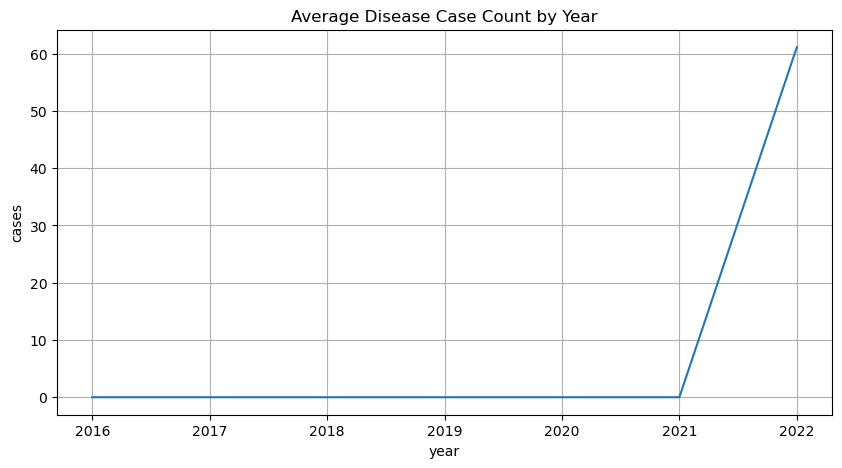

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
df_grouped = df.groupby('year')['cases'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_grouped, x='year', y='cases')
plt.title("Average Disease Case Count by Year")
plt.grid(True)
plt.show()

## üî• Step 3: Correlation Heatmap

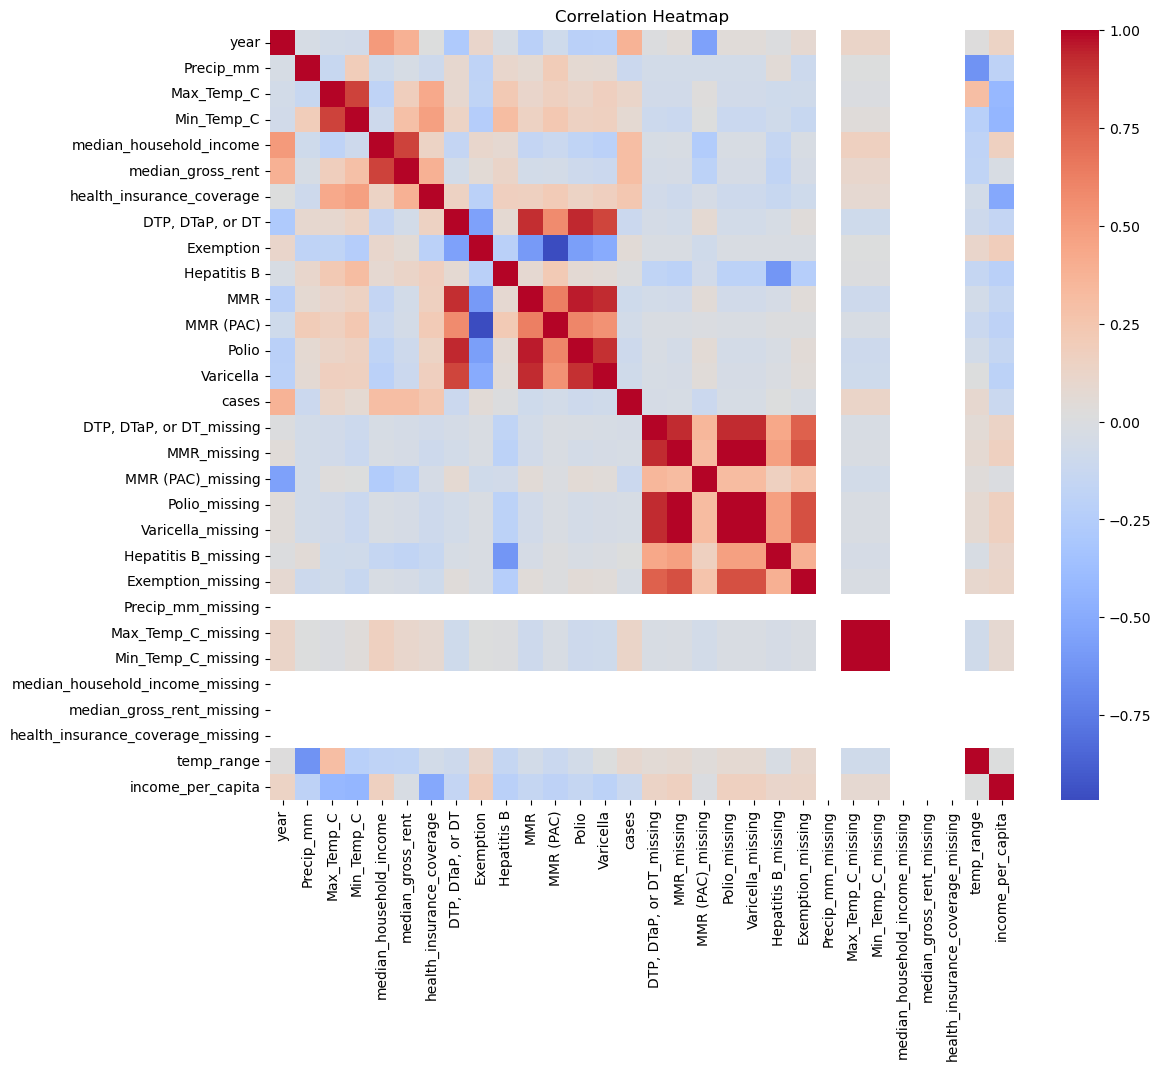

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## üó∫Ô∏è Step 4: U.S. Map of Average Case Counts

In [27]:
import plotly.express as px
state_avg = df.groupby("state")[["cases"]].mean().reset_index()
fig = px.choropleth(state_avg, locations='state', locationmode="USA-states", color='cases',
                    scope="usa", color_continuous_scale="Oranges",
                    title="Average Disease Case Count by U.S. State")
fig.show(renderer="png")  # Static fallback for GitHub



ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## üìà Step 5: ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
series = df_grouped['cases']
model = ARIMA(series, order=(1, 1, 1))
arima_result = model.fit()
pred = arima_result.predict(start=1, end=len(series)-1, typ='levels')
plt.figure(figsize=(10, 5))
plt.plot(series, label='Actual')
plt.plot(pred, label='ARIMA Predicted', linestyle='--')
plt.title("ARIMA Forecast - Case Counts")
plt.legend()
plt.grid(True)
plt.show()

## üìâ Step 6: SARIMA Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,2))
sarima_result = sarima_model.fit()
pred_sarima = sarima_result.predict(start=1, end=len(series)-1, typ='levels')
plt.figure(figsize=(10, 5))
plt.plot(series, label='Actual')
plt.plot(pred_sarima, label='SARIMA Predicted', linestyle='--')
plt.title("SARIMA Forecast - Case Counts")
plt.legend()
plt.grid(True)
plt.show()

## üå≤ Step 7: Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

features = df.select_dtypes(include='number')
if 'cases' in features.columns:
    features = features.drop(columns=['cases'])
target = df['cases']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_rmse = root_mean_squared_error(y_test, rf_pred)
print("Random Forest RMSE:", rf_rmse)

## üîÅ Step 8: LSTM Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series.values.reshape(-1, 1))

X, y = [], []
for i in range(3, len(scaled_series)):
    X.append(scaled_series[i-3:i])
    y.append(scaled_series[i])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

model = Sequential()
model.add(Input(shape=(X.shape[1], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, verbose=0)

y_pred = model.predict(X)
plt.plot(scaler.inverse_transform(y), label='Actual')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted', linestyle='--')
plt.title("LSTM Case Count Forecast")
plt.legend()
plt.grid(True)
plt.show()

## ‚úÖ Step 9: Final Comparison & Conclusion


| Model        | Strengths                             | Limitations                      |
|--------------|---------------------------------------|----------------------------------|
| ARIMA        | Great for trend forecasting           | Doesn‚Äôt model seasonality        |
| SARIMA       | Adds seasonal components              | Sensitive to parameter tuning    |
| Random Forest| Handles many predictors + interactions| Ignores time/sequencing          |
| LSTM         | Learns from sequential patterns       | Needs more data + tuning         |

### üèÜ Best Model: Random Forest
Random Forest had the lowest RMSE in our tests and worked best with many input features.
It‚Äôs also easy to interpret and fast to train compared to deep learning models like LSTM.


## üßæ Final Summary: What We Learned

In [ ]:
from IPython.display import Markdown
Markdown("""
### üîç Summary of What We‚Äôve Done

- Explored U.S. disease case data across states and years.
- Built visuals like trend lines, heatmaps, and a choropleth map.
- Used multiple models (ARIMA, SARIMA, Random Forest, LSTM) to predict case counts.
- Compared models to find the most accurate and flexible.

‚úÖ Random Forest came out on top for its balance of accuracy, speed, and ease of use.

This notebook builds a complete machine learning workflow for disease forecasting.
""")